# Initialization

- Load Data (pre-processed)
- separete data in X and y, the, do the train/test/split

# Runing models

- Run model
- Execution of the Fine Tuning
- Repeat de process for the KNN and Bayes

In [35]:
import pandas as pd 
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from utils import train_and_search, plot_results, handle_param_names, show_value_counts, plot_grid, plot_cf_matrix

In [5]:
bank = pd.read_csv('../dataset/bank-preprocessed.csv')

In [62]:
X = bank.drop('y', axis=1)
y = bank['y']

In [7]:
bank['y'].value_counts()

0    38257
1     5037
Name: y, dtype: int64

Separating the data

In [63]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED, stratify=y)

Defining model and parameters

In [10]:
model = KNeighborsClassifier()

In [12]:
from itertools import product
alth = ['auto', 'ball_tree', 'kd_tree', 'brute']
wg = ['uniform','distance']
metric = ['euclidean','manhattan']

search_space = tuple(product(alth,wg,metric))

In [22]:
from tqdm import tqdm 
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline

def search_cross_valid(search_space, X_train, y_train, SEED=42):
    scores_valid, params = [], []

    for alth, wg, metric in tqdm(search_space, desc="Training: "):
        model = KNeighborsClassifier(algorithm=alth, weights=wg, metric=metric)

        cv = StratifiedKFold(n_splits=10, random_state=SEED, shuffle=True)

        steps = [('model', model)]
        pipeline = Pipeline(steps=steps)

        scores = cross_val_score(pipeline, X_train, y_train, scoring='f1_micro', cv=cv, n_jobs=-1)
        print('Mean f1: %.3f' % np.mean(scores))

        parm = dict(algorithm=alth, weights=wg, metric=metric)

        print("Parameters: ", parm)
        print("Score of validation: ", np.mean(scores))

        scores_valid.append(np.mean(scores))
        params.append(parm)

    scores_train = []
    scores_train.append(0)
    zipped_results = zip(scores_train, scores_valid, params)
    best_result =  max(zipped_results, key = lambda res: res[1])
    best_scores_train, best_score_valid, best_params = best_result

    print('------------------------------')
    print("Melhores parâmetros: ", best_params)
    print("Melhor score de validação: ", best_score_valid)
    
    return scores_valid, best_score_valid, params, best_params

In [23]:
scores_valid, best_score_valid, params, best_params = search_cross_valid(search_space, X_train, y_train)

Training:   6%|████▌                                                                    | 1/16 [00:43<10:56, 43.79s/it]

Mean f1: 0.882
Parameters:  {'algorithm': 'auto', 'weights': 'uniform', 'metric': 'euclidean'}
Score of validation:  0.882228752453352


Training:  12%|█████████▏                                                               | 2/16 [01:12<08:11, 35.09s/it]

Mean f1: 0.885
Parameters:  {'algorithm': 'auto', 'weights': 'uniform', 'metric': 'manhattan'}
Score of validation:  0.8854047055677338


Training:  19%|█████████████▋                                                           | 3/16 [02:00<08:51, 40.88s/it]

Mean f1: 0.883
Parameters:  {'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean'}
Score of validation:  0.8826908046061333


Training:  25%|██████████████████▎                                                      | 4/16 [02:29<07:12, 36.03s/it]

Mean f1: 0.885
Parameters:  {'algorithm': 'auto', 'weights': 'distance', 'metric': 'manhattan'}
Score of validation:  0.8848562484036122


Training:  31%|██████████████████████▊                                                  | 5/16 [02:33<04:31, 24.70s/it]

Mean f1: 0.882
Parameters:  {'algorithm': 'ball_tree', 'weights': 'uniform', 'metric': 'euclidean'}
Score of validation:  0.882228752453352


Training:  38%|███████████████████████████▍                                             | 6/16 [02:37<02:54, 17.47s/it]

Mean f1: 0.886
Parameters:  {'algorithm': 'ball_tree', 'weights': 'uniform', 'metric': 'manhattan'}
Score of validation:  0.8858089459739016


Training:  44%|███████████████████████████████▉                                         | 7/16 [02:41<01:58, 13.19s/it]

Mean f1: 0.883
Parameters:  {'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'euclidean'}
Score of validation:  0.8826908046061333


Training:  50%|████████████████████████████████████▌                                    | 8/16 [02:44<01:20, 10.05s/it]

Mean f1: 0.885
Parameters:  {'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'manhattan'}
Score of validation:  0.8852027270805394


Training:  56%|█████████████████████████████████████████                                | 9/16 [02:46<00:51,  7.35s/it]

Mean f1: 0.882
Parameters:  {'algorithm': 'kd_tree', 'weights': 'uniform', 'metric': 'euclidean'}
Score of validation:  0.8822287441171233


Training:  62%|█████████████████████████████████████████████                           | 10/16 [02:48<00:34,  5.70s/it]

Mean f1: 0.886
Parameters:  {'algorithm': 'kd_tree', 'weights': 'uniform', 'metric': 'manhattan'}
Score of validation:  0.8859533294564311


Training:  69%|█████████████████████████████████████████████████▌                      | 11/16 [02:49<00:22,  4.43s/it]

Mean f1: 0.883
Parameters:  {'algorithm': 'kd_tree', 'weights': 'distance', 'metric': 'euclidean'}
Score of validation:  0.8826907962699044


Training:  75%|██████████████████████████████████████████████████████                  | 12/16 [02:51<00:14,  3.58s/it]

Mean f1: 0.885
Parameters:  {'algorithm': 'kd_tree', 'weights': 'distance', 'metric': 'manhattan'}
Score of validation:  0.8852893571700571


Training:  81%|██████████████████████████████████████████████████████████▌             | 13/16 [03:19<00:32, 10.90s/it]

Mean f1: 0.882
Parameters:  {'algorithm': 'brute', 'weights': 'uniform', 'metric': 'euclidean'}
Score of validation:  0.882228752453352


Training:  88%|███████████████████████████████████████████████████████████████         | 14/16 [03:47<00:32, 16.27s/it]

Mean f1: 0.885
Parameters:  {'algorithm': 'brute', 'weights': 'uniform', 'metric': 'manhattan'}
Score of validation:  0.8854047055677338


Training:  94%|███████████████████████████████████████████████████████████████████▌    | 15/16 [04:28<00:23, 23.51s/it]

Mean f1: 0.883
Parameters:  {'algorithm': 'brute', 'weights': 'distance', 'metric': 'euclidean'}
Score of validation:  0.8826908046061333


Training: 100%|████████████████████████████████████████████████████████████████████████| 16/16 [04:57<00:00, 18.58s/it]

Mean f1: 0.885
Parameters:  {'algorithm': 'brute', 'weights': 'distance', 'metric': 'manhattan'}
Score of validation:  0.8848562484036122
------------------------------
Melhores parâmetros:  {'algorithm': 'auto', 'weights': 'uniform', 'metric': 'euclidean'}
Melhor score de validação:  0.882228752453352


In [68]:
results_knn = pd.DataFrame({'model': 'KNN', 'parameters': params, 'mean_test_score': scores_valid})

results_knn

,model,parameters,mean_test_score
0,KNN,"{'algorithm': 'auto', 'weights': 'uniform', 'metric': 'euclidean'}",0.882229
1,KNN,"{'algorithm': 'auto', 'weights': 'uniform', 'metric': 'manhattan'}",0.885405
2,KNN,"{'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean'}",0.882691
3,KNN,"{'algorithm': 'auto', 'weights': 'distance', 'metric': 'manhattan'}",0.884856
4,KNN,"{'algorithm': 'ball_tree', 'weights': 'uniform', 'metric': 'euclidean'}",0.882229
5,KNN,"{'algorithm': 'ball_tree', 'weights': 'uniform', 'metric': 'manhattan'}",0.885809
6,KNN,"{'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'euclidean'}",0.882691
7,KNN,"{'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'manhattan'}",0.885203
8,KNN,"{'algorithm': 'kd_tree', 'weights': 'uniform', 'metric': 'euclidean'}",0.882229
9,KNN,"{'algorithm': 'kd_tree', 'weights': 'uniform', 'metric': 'manhattan'}",0.885953


### Now that we have the best composition of parameters, we are going to retrain de model with those

In [29]:
model_best = KNeighborsClassifier(**best_params)

In [30]:
model_best.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

0.8774685298533318


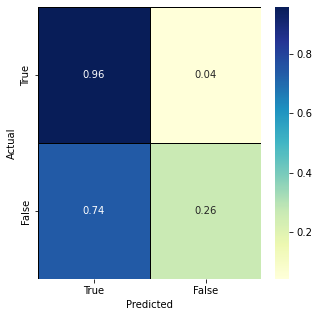

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7652
           1       0.45      0.26      0.33      1007

    accuracy                           0.88      8659
   macro avg       0.68      0.61      0.63      8659
weighted avg       0.86      0.88      0.86      8659



In [37]:
y_pred = model_best.predict(X_test)

print(f1_score(y_test, y_pred, average='micro'))
plot_cf_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

### Impressions about the results

Exploring the results, we easely can see that the model has accuracy problems we it tryes to predict the value 1, from y. It happens because the dataset is unbalanced. For the next section, we are going  to solve this, by applying balancing technics.

## Using balanced dataset - SMOTET method

In [38]:
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import NearMiss

In [39]:
X_train_upsample, y_train_upsample = SMOTETomek(random_state=42).fit_resample(X_train, y_train)

In [43]:
print(X_train.shape,"\n",y_train.value_counts(),"\n",y_train_upsample.value_counts())

(34635, 45) 
 0    30605
1     4030
Name: y, dtype: int64 
 0    29853
1    29853
Name: y, dtype: int64


In [45]:
model_best_bal = KNeighborsClassifier(**best_params)
model_best_bal.fit(X_train_upsample,y_train_upsample)

KNeighborsClassifier(metric='euclidean')

0.7681025522577665


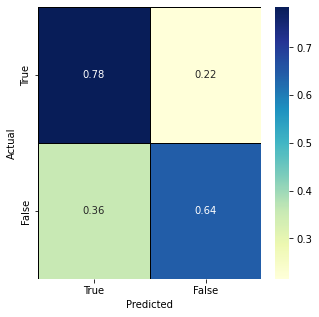

              precision    recall  f1-score   support

           0       0.94      0.78      0.86      7652
           1       0.28      0.64      0.39      1007

    accuracy                           0.77      8659
   macro avg       0.61      0.71      0.62      8659
weighted avg       0.87      0.77      0.80      8659



In [47]:
# for the test set
y_pred_bal = model_best_bal.predict(X_test)

print(f1_score(y_test, y_pred_bal, average='micro'))
plot_cf_matrix(y_test, y_pred_bal)
print(classification_report(y_test, y_pred_bal))

Even with the application of the `SMOTET` to solve the balance issues, the model get worst after this changes. Even the training time get way bigger.

## Using balanced dataset - Under Sampling Method

In [48]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours 

X_train_upsample2, y_train_upsample2 = RepeatedEditedNearestNeighbours().fit_resample(X_train, y_train)
model_best_balanced2 = KNeighborsClassifier(**best_params)
model_best_balanced2.fit(X_train_upsample2, y_train_upsample2)

KNeighborsClassifier(metric='euclidean')

0.8365862108788543


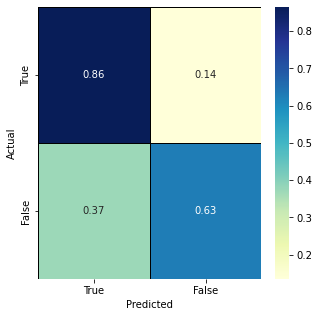

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7652
           1       0.38      0.63      0.47      1007

    accuracy                           0.84      8659
   macro avg       0.66      0.74      0.69      8659
weighted avg       0.88      0.84      0.85      8659



In [49]:
y_pred_bal2 = model_best_balanced2.predict(X_test)

print(f1_score(y_test, y_pred_bal2, average='micro'))
plot_cf_matrix(y_test, y_pred_bal2)
print(classification_report(y_test, y_pred_bal2))

## Using balanced dataset - RandomOverSampler method

In [53]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=SEED)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
model_best_balanced22 = KNeighborsClassifier(**best_params)
model_best_balanced22.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(metric='euclidean')

0.786349462986488


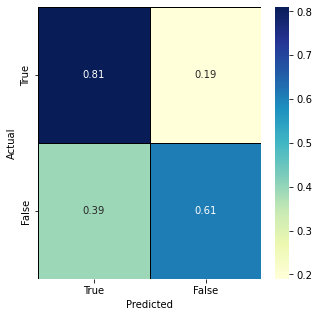

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      7652
           1       0.30      0.61      0.40      1007

    accuracy                           0.79      8659
   macro avg       0.62      0.71      0.63      8659
weighted avg       0.87      0.79      0.82      8659



In [54]:
y_pred_bal22 = model_best_balanced22.predict(X_test)

print(f1_score(y_test, y_pred_bal22, average='micro'))
plot_cf_matrix(y_test, y_pred_bal22)
print(classification_report(y_test, y_pred_bal22))

## Training  the best built model without the features 'balance' and 'duration'

In [64]:
#X_train.drop(['balance'],axis=1,inplace=True)
#X_test.drop(['balance'],axis=1,inplace=True)

X_train.drop(['duration'],axis=1,inplace=True)
X_test.drop(['duration'],axis=1,inplace=True)

In [65]:
model_best.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

0.8726180852292412


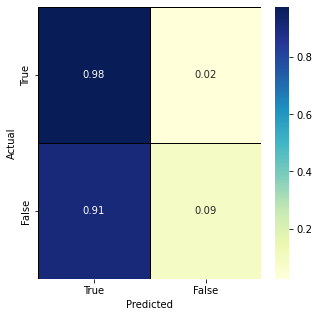

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7652
           1       0.33      0.09      0.14      1007

    accuracy                           0.87      8659
   macro avg       0.61      0.53      0.54      8659
weighted avg       0.83      0.87      0.84      8659



In [66]:
y_pred = model_best.predict(X_test)

print(f1_score(y_test, y_pred, average='micro'))
plot_cf_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

# Saving best model

In [69]:
results_knn

,model,parameters,mean_test_score
0,KNN,"{'algorithm': 'auto', 'weights': 'uniform', 'metric': 'euclidean'}",0.882229
1,KNN,"{'algorithm': 'auto', 'weights': 'uniform', 'metric': 'manhattan'}",0.885405
2,KNN,"{'algorithm': 'auto', 'weights': 'distance', 'metric': 'euclidean'}",0.882691
3,KNN,"{'algorithm': 'auto', 'weights': 'distance', 'metric': 'manhattan'}",0.884856
4,KNN,"{'algorithm': 'ball_tree', 'weights': 'uniform', 'metric': 'euclidean'}",0.882229
5,KNN,"{'algorithm': 'ball_tree', 'weights': 'uniform', 'metric': 'manhattan'}",0.885809
6,KNN,"{'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'euclidean'}",0.882691
7,KNN,"{'algorithm': 'ball_tree', 'weights': 'distance', 'metric': 'manhattan'}",0.885203
8,KNN,"{'algorithm': 'kd_tree', 'weights': 'uniform', 'metric': 'euclidean'}",0.882229
9,KNN,"{'algorithm': 'kd_tree', 'weights': 'uniform', 'metric': 'manhattan'}",0.885953


In [78]:
df_results = pd.read_csv("../models/results_models.csv")

In [71]:
df_results = pd.concat([results_knn, df_results], ignore_index=True)

In [72]:
df_results.to_csv("../models/results_models.csv", index=False)

# Exporting model

In [73]:
from joblib import dump, load
dump(model_best, '../models/knn.joblib') 

['../models/knn.joblib']